In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-3.3.0               |           py36_0         747 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

In [89]:
# Heading 1
# Heading 2
## Heading 2.1
## Heading 2.2

In [2]:
#body = client_5152e1fc490349768fca6ab62f76e0c6.get_object(Bucket='course9week4ownproject-donotdelete-pr-y74k9nphueyqzk',Key='ACCIDENT.csv')['Body'] # add missing __iter__ method, so pandas accepts body as file-like object if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body ) # If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.df_data_0 = pd.read_csv(body) df_data_0.head() import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5152e1fc490349768fca6ab62f76e0c6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HJ-DVDr1hvB2laXKh6B9WN3eHAQ03Cz7_95CoQoTvVzL',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5152e1fc490349768fca6ab62f76e0c6.get_object(Bucket='course9week4ownproject-donotdelete-pr-y74k9nphueyqzk',Key='Geospatial_Coordinates_MD_VA.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body, 'MD')
df_data_0['CityState'] = df_data_0["City name"]+", MD"
df_data_0.rename(columns={'County name':'CountyName'},  inplace=True)
df_filtered_MD = df_data_0[(df_data_0.CountyName == "Montgomery County, MD") | (df_data_0.CountyName == "Baltimore County, MD") | (df_data_0.CountyName == "Prince George's County, MD")]
df_filtered_MD.dropna()
df_filtered_MD.head()

City name  Total 2010 Population                  CountyName  \
3      Accokeek                  10573  Prince George's County, MD   
5       Adelphi                  15086  Prince George's County, MD   
8   Andrews AFB                   2973  Prince George's County, MD   
12      Aquasco                    981  Prince George's County, MD   
13      Arbutus                  20483        Baltimore County, MD   

    % of City in County        CityState  
3                   1.0     Accokeek, MD  
5                   1.0      Adelphi, MD  
8                   1.0  Andrews AFB, MD  
12                  1.0      Aquasco, MD  
13                  1.0      Arbutus, MD

In [3]:
import pandas as pd 
gk = df_filtered_MD.groupby(['CountyName']).count()
gk


City name  Total 2010 Population  \
CountyName                                                     
Baltimore County, MD               31                     31   
Montgomery County, MD              56                     56   
Prince George's County, MD         82                     82   

                            % of City in County  CityState  
CountyName                                                  
Baltimore County, MD                         31         31  
Montgomery County, MD                        56         56  
Prince George's County, MD                   82         82

In [5]:

from geopy.geocoders import Nominatim
nom=Nominatim()
n=nom.geocode("Wheaton,MD")
n
df_filtered_MD["Address"]=df_filtered_MD["CityState"].apply(nom.geocode)
df_filtered_MD["latitude"]=df_filtered_MD["Address"].apply(lambda x: x.latitude if x !=None else None)
df_filtered_MD["longitude"]=df_filtered_MD["Address"].apply(lambda x: x.longitude if x !=None else None)
df_filtered_MD = df_filtered_MD.dropna(axis="index",how="any")
#df_filtered_MD=df_filtered_MD[2:]
df_filtered_MD.head()#[0:50]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


GeocoderUnavailable: Service not available

In [15]:
df_filtered_MD.head()

City name  Total 2010 Population                  CountyName  \
3      Accokeek                  10573  Prince George's County, MD   
5       Adelphi                  15086  Prince George's County, MD   
8   Andrews AFB                   2973  Prince George's County, MD   
12      Aquasco                    981  Prince George's County, MD   
13      Arbutus                  20483        Baltimore County, MD   

    % of City in County        CityState  
3                   1.0     Accokeek, MD  
5                   1.0      Adelphi, MD  
8                   1.0  Andrews AFB, MD  
12                  1.0      Aquasco, MD  
13                  1.0      Arbutus, MD

In [11]:
address = 'Montgomery County, MD'

geolocator = Nominatim(user_agent="md_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of maryland cities are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of maryland cities are 39.1406267, -77.2075612.


In [6]:
#import folium
#from IPython.display import display
#LDN_COORDINATES = (latitude, longitude)
#myMap = folium.Map(location=LDN_COORDINATES, zoom_start=10)
#myMap


In [13]:
# create map of New York using latitude and longitude values
map_MD = folium.Map(location=[latitude, longitude], zoom_start=10)
map_MD

In [14]:
# create map of New York using latitude and longitude values
#map_MD = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, CityState, CountyName in zip(df_filtered_MD['latitude'], df_filtered_MD['longitude'], df_filtered_MD['CityState'], df_filtered_MD['CountyName']):
    label = '{}, {}'.format(CityState, CountyName)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_MD)  
    
map_MD

KeyError: 'latitude'

In [15]:
#danie.abebe

CLIENT_ID = 'TOYINSWAIHDVPGNDKONIVD4A11BHWMOPKSLXBJ1BEBYUQDXL'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET ='UHMVWV2XXZT4QWPZD5X24CKE0HKOR3NQGLAWCBN4HSPIM1EG'# 'your-client-secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TOYINSWAIHDVPGNDKONIVD4A11BHWMOPKSLXBJ1BEBYUQDXL
CLIENT_SECRET:UHMVWV2XXZT4QWPZD5X24CKE0HKOR3NQGLAWCBN4HSPIM1EG


In [16]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL




'https://api.foursquare.com/v2/venues/explore?&client_id=TOYINSWAIHDVPGNDKONIVD4A11BHWMOPKSLXBJ1BEBYUQDXL&client_secret=UHMVWV2XXZT4QWPZD5X24CKE0HKOR3NQGLAWCBN4HSPIM1EG&v=20180605&ll=39.1406267,-77.2075612&radius=500&limit=100'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dd33b9060ba080026ee5328'},
 'response': {'headerLocation': 'Gaithersburg',
  'headerFullLocation': 'Gaithersburg',
  'headerLocationGranularity': 'city',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 39.1451267045, 'lng': -77.2017700600332},
   'sw': {'lat': 39.136126695499996, 'lng': -77.2133523399668}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8ac7f1f964a520888032e3',
       'name': 'Rugged Wearhouse',
       'location': {'address': '230 N Frederick Ave',
        'lat': 39.14370369762039,
        'lng': -77.20355361700058,
        'labeledLatLngs': [{'label': 'display',
          'lat': 39.14370369762039,
          'lng': -77.20355361700058}],
        'distance': 486,
        'postalCode': '20877',
        'cc':

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# type your answer here

Maryland_venues = getNearbyVenues(names=df_filtered_MD['CityState'],
                                   latitudes=df_filtered_MD['latitude'],
                                   longitudes=df_filtered_MD['longitude']
                                  )


Accokeek, MD
Adelphi, MD
Andrews AFB, MD
Aquasco, MD
Arbutus, MD
Ashton-Sandy Spring, MD
Aspen Hill, MD
Baden, MD
Baltimore Highlands, MD
Beltsville, MD
Berwyn Heights town, MD
Bethesda, MD
Bladensburg town, MD
Bowie city, MD
Bowleys Quarters, MD
Brandywine, MD
Brookeville town, MD
Brookmont, MD
Burtonsville, MD
Cabin John, MD
Camp Springs, MD
Carney, MD
Catonsville, MD
Cedarville, MD
Cheverly town, MD
Chevy Chase, MD
Chevy Chase Section Five village, MD
Chevy Chase Section Three village, MD
Chevy Chase town, MD
Chillum, MD
Clarksburg, MD
Clinton, MD
Cloverly, MD
Cockeysville, MD
Colesville, MD
College Park city, MD
Coral Hills, MD
Croom, MD
Damascus, MD
Darnestown, MD
Derwood, MD
District Heights city, MD
Dundalk, MD
East Riverdale, MD
Edgemere, MD
Edmonston town, MD
Essex, MD
Fairland, MD
Fairwood, MD
Forest Glen, MD
Forestville, MD
Fort Washington, MD
Four Corners, MD
Friendly, MD
Friendship Heights Village, MD
Gaithersburg city, MD
Garrison, MD
Germantown, MD
Glassmanor, MD
Glenard

In [24]:
print(Maryland_venues.shape)
Maryland_venues

(2122, 7)


Neighborhood  Neighborhood Latitude  \
0                              Accokeek, MD              38.667617   
1                              Accokeek, MD              38.667617   
2                              Accokeek, MD              38.667617   
3                               Adelphi, MD              39.003067   
4                               Adelphi, MD              39.003067   
5                               Adelphi, MD              39.003067   
6                               Adelphi, MD              39.003067   
7                               Adelphi, MD              39.003067   
8                               Adelphi, MD              39.003067   
9                               Adelphi, MD              39.003067   
10                              Adelphi, MD              39.003067   
11                              Adelphi, MD              39.003067   
12                              Adelphi, MD              39.003067   
13                              Adelphi, MD              39.003067   
14                              Adelphi, MD              39.003067   
15                          Andrews AFB, MD              38.805661   
16                          Andrews AFB, MD              38.805661   
17                              Aquasco, MD              38.585120   
18                              Aquasco, MD              38.585120   
19                              Aquasco, MD              38.585120   
20                              Arbutus, MD              39.249683   
21                              Arbutus, MD              39.249683   
22                              Arbutus, MD              39.249683   
23                              Arbutus, MD              39.249683   
24                              Arbutus, MD              39.249683   
25                              Arbutus, MD              39.249683   
26                              Arbutus, MD              39.249683   
27                              Arbutus, MD              39.249683   
28                              Arbutus, MD              39.249683   
29                              Arbutus, MD              39.249683   
30                              Arbutus, MD              39.249683   
31                              Arbutus, MD              39.249683   
32                              Arbutus, MD              39.249683   
33                              Arbutus, MD              39.249683   
34                              Arbutus, MD              39.249683   
35                              Arbutus, MD              39.249683   
36                              Arbutus, MD              39.249683   
37                              Arbutus, MD              39.249683   
38                  Ashton-Sandy Spring, MD              39.150789   
39                           Aspen Hill, MD              39.079498   
40                           Aspen Hill, MD              39.079498   
41                           Aspen Hill, MD              39.079498   
42                           Aspen Hill, MD              39.079498   
43                           Aspen Hill, MD              39.079498   
44                           Aspen Hill, MD              39.079498   
45                           Aspen Hill, MD              39.079498   
46                           Aspen Hill, MD              39.079498   
47                           Aspen Hill, MD              39.079498   
48                           Aspen Hill, MD              39.079498   
49                           Aspen Hill, MD              39.079498   
50                           Aspen Hill, MD              39.079498   
51                           Aspen Hill, MD              39.079498   
52                           Aspen Hill, MD              39.079498   
53                           Aspen Hill, MD              39.079498   
54                           Aspen Hill, MD              39.079498   
55                           Aspen Hill, MD              39.079498   
56                           Aspen Hill, 

In [25]:
Maryland_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                   
Accokeek, MD                                               3   
Adelphi, MD                                               12   
Andrews AFB, MD                                            2   
Aquasco, MD                                                3   
Arbutus, MD                                               18   
Ashton-Sandy Spring, MD                                    1   
Aspen Hill, MD                                            20   
Baden, MD                                                  2   
Baltimore Highlands, MD                                    4   
Beltsville, MD                                            26   
Berwyn Heights town, MD                                    9   
Bethesda, MD                                             100   
Bladensburg town, MD                                      10   
Bowie city, MD                                            61   
Bowleys Quarters, MD                                       2   
Brandywine, MD                                             4   
Brookeville town, MD                                       3   
Brookmont, MD                                              4   
Burtonsville, MD                                          45   
Cabin John, MD                                            11   
Camp Springs, MD                                          15   
Carney, MD                                                23   
Catonsville, MD                                           49   
Cedarville, MD                                             2   
Cheverly town, MD                                          7   
Chevy Chase Section Five village, MD                       7   
Chevy Chase Section Three village, MD                      6   
Chevy Chase town, MD                                       4   
Chevy Chase, MD                                            7   
Chillum, MD                                               10   
Clarksburg, MD                                             8   
Clinton, MD                                               11   
Cockeysville, MD                                           4   
Colesville, MD                                            22   
College Park city, MD                                     45   
Coral Hills, MD                                            8   
Damascus, MD                                              27   
Darnestown, MD                                             6   
Derwood, MD                                               11   
District Heights city, MD                                  2   
Dundalk, MD                                               18   
East Riverdale, MD                                         3   
Edgemere, MD                                              11   
Edmonston town, MD                                         4   
Essex, MD                                                 14   
Fairland, MD                                               4   
Forest Glen, MD                                            2   
Forestville, MD                                           12   
Fort Washington, MD                                        4   
Four Corners, MD                                          21   
Friendly, MD                                               2   
Friendship Heights Village, MD                            39   
Gaithersburg city, MD                                     19   
Garrison, MD                                               3   
Germantown, MD                                             6   
Glassmanor, MD                                            28   
Glenarden city, MD                                         4   
Glenmont, MD                                              14   
Glenn Dale, MD                                            11   
Greenbelt city, MD                                        23   
Hampton, MD                                                2   
Hillcre

In [26]:
print('There are {} uniques categories.'.format(len(Maryland_venues['Venue Category'].unique())))

There are 271 uniques categories.


In [27]:
#There are 5 Boroughs in NY assume 
#and 306 Neighborhoods in all these 5 Boroughs together
#and 3337 Venues - but 336 Unique Categories

# one hot encoding
Maryland_onehot = pd.get_dummies(Maryland_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Maryland_onehot['Neighborhood'] = Maryland_venues['Neighborhood'] 
#Maryland_onehot
# move neighborhood column to the first column
fixed_columns = [Maryland_onehot.columns[-1]] + list(Maryland_onehot.columns[:-1])
Maryland_onehot = Maryland_onehot[fixed_columns]

Maryland_onehot.head()
#manhattan_onehot.shape

Yoga Studio  Accessories Store  Afghan Restaurant  African Restaurant  \
0            0                  0                  0                   0   
1            0                  0                  0                   0   
2            0                  0                  0                   0   
3            0                  0                  0                   0   
4            0                  0                  0                   0   

   Airport  American Restaurant  Antique Shop  Arepa Restaurant  Art Gallery  \
0        0                    0             0                 0            0   
1        0                    0             0                 0            0   
2        0                    0             0                 0            0   
3        0                    0             0                 0            0   
4        0                    0             0                 0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Dealership  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0                0          0           0       0     0    0               0   
1                0          0           0       0     0    0               0   
2                0          0           0       0     0    0               0   
3                0          0           0       0     0    0               0   
4                0          0           0       0     0    0               0   

   Basketball Court  Beach  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0                 0      0         0            0           0              0   
1                 0      0         0            0           0              0   
2                 0      0         0            0           0              0   
3                 0      0         0            0           0              0   
4                 0      0         0            0           0              0   

   Bookstore  Boutique  Bowling Alley  Boxing Gym  Brazilian Restaurant  \
0          0         0              0           0                     0   
1          0         0              0           0                     0   
2          0         0              0           0                     0   
3          0         0              0           0                     0   
4          0         0              0           0                     0   

   Breakfast Spot  Brewery  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0               0        0                0       0         0             0   
1               0        0                0       0         0             0   
2               0        0                0       0         0             0   
3               0        0                0       0         0             0   
4               0        0                0       0         0             0   

   Bus Line  Bus Station  Bus Stop  Business Service  Butcher  Cafeteria  \
0         0            0         0                 0        0          0   
1         0            0         0                 0        0          0   
2         0            0         0                 0        0          0   
3         0            0         0                 0        0          0   
4         0            0         0                 0        0          0   

   Café  Camera Store  Candy Store  Caribbean Restaurant  Chinese Restaurant  \
0     0             0            0                     0                   0   
1     0             0            0                     0                 

In [28]:
Maryland_grouped = Maryland_onehot.groupby('Neighborhood').mean().reset_index()
Maryland_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                             Accokeek, MD     0.000000           0.000000   
1                              Adelphi, MD     0.000000           0.000000   
2                          Andrews AFB, MD     0.000000           0.000000   
3                              Aquasco, MD     0.000000           0.000000   
4                              Arbutus, MD     0.000000           0.000000   
5                  Ashton-Sandy Spring, MD     0.000000           0.000000   
6                           Aspen Hill, MD     0.000000           0.000000   
7                                Baden, MD     0.000000           0.000000   
8                  Baltimore Highlands, MD     0.000000           0.000000   
9                           Beltsville, MD     0.000000           0.000000   
10                 Berwyn Heights town, MD     0.000000           0.000000   
11                            Bethesda, MD     0.020000           0.000000   
12                    Bladensburg town, MD     0.000000           0.000000   
13                          Bowie city, MD     0.000000           0.032787   
14                    Bowleys Quarters, MD     0.000000           0.000000   
15                          Brandywine, MD     0.000000           0.000000   
16                    Brookeville town, MD     0.000000           0.000000   
17                           Brookmont, MD     0.000000           0.000000   
18                        Burtonsville, MD     0.000000           0.000000   
19                          Cabin John, MD     0.000000           0.000000   
20                        Camp Springs, MD     0.000000           0.000000   
21                              Carney, MD     0.043478           0.000000   
22                         Catonsville, MD     0.020408           0.000000   
23                          Cedarville, MD     0.000000           0.000000   
24                       Cheverly town, MD     0.000000           0.000000   
25    Chevy Chase Section Five village, MD     0.000000           0.000000   
26   Chevy Chase Section Three village, MD     0.000000           0.000000   
27                    Chevy Chase town, MD     0.000000           0.000000   
28                         Chevy Chase, MD     0.000000           0.000000   
29                             Chillum, MD     0.000000           0.000000   
30                          Clarksburg, MD     0.000000           0.000000   
31                             Clinton, MD     0.000000           0.000000   
32                        Cockeysville, MD     0.000000           0.000000   
33                          Colesville, MD     0.000000           0.000000   
34                   College Park city, MD     0.000000           0.000000   
35                         Coral Hills, MD     0.000000           0.000000   
36                            Damascus, MD     0.000000           0.000000   
37                          Darnestown, MD     0.000000           0.000000   
38                             Derwood, MD     0.000000           0.000000   
39               District Heights city, MD     0.000000           0.000000   
40                             Dundalk, MD     0.000000           0.000000   
41                      East Riverdale, MD     0.000000           0.000000   
42                            Edgemere, MD     0.000000           0.000000   
43                      Edmonston town, MD     0.000000           0.000000   
44                               Essex, MD     0.000000           0.000000   
45                            Fairland, MD     0.000000           0.000000   
46                         Forest Glen, MD     0.000000           0.000000   
47                         Forestville, MD     0.000000           0.000000   
48                     Fort Washington, MD     0.000000           0.000000   
49                        Four Corners, MD     0.000000           0.000000   
50                            Friendly, MD     0.000

In [29]:
num_top_venues = 5

for hood in Maryland_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Maryland_grouped[Maryland_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Accokeek, MD----
           venue  freq
0           Park  0.33
1   Home Service  0.33
2    Rugby Pitch  0.33
3     Nail Salon  0.00
4  National Park  0.00


----Adelphi, MD----
                 venue  freq
0   Mexican Restaurant  0.08
1                 Food  0.08
2  Fried Chicken Joint  0.08
3  American Restaurant  0.08
4          Pizza Place  0.08


----Andrews AFB, MD----
               venue  freq
0   Video Game Store   0.5
1            Airport   0.5
2        Yoga Studio   0.0
3  Other Repair Shop   0.0
4    Other Nightlife   0.0


----Aquasco, MD----
               venue  freq
0   Business Service  0.67
1      Deli / Bodega  0.33
2        Yoga Studio  0.00
3             Office  0.00
4  Outdoor Sculpture  0.00


----Arbutus, MD----
                        venue  freq
0                 Pizza Place  0.17
1              Sandwich Place  0.11
2  Construction & Landscaping  0.06
3            Asian Restaurant  0.06
4               Shopping Mall  0.06


----Ashton-Sandy Spring, MD----
 

                     venue  freq
0       Italian Restaurant  0.33
1            Shopping Mall  0.33
2             Optical Shop  0.33
3  North Indian Restaurant  0.00
4        Other Repair Shop  0.00


----Edgemere, MD----
               venue  freq
0  Convenience Store  0.27
1                Bar  0.18
2               Food  0.09
3     Discount Store  0.09
4       Liquor Store  0.09


----Edmonston town, MD----
                    venue  freq
0  Furniture / Home Store  0.25
1            Intersection  0.25
2             Pizza Place  0.25
3      Mexican Restaurant  0.25
4             Yoga Studio  0.00


----Essex, MD----
                 venue  freq
0  American Restaurant  0.14
1   Seafood Restaurant  0.14
2          Gas Station  0.07
3  Leather Goods Store  0.07
4          Pizza Place  0.07


----Fairland, MD----
                     venue  freq
0            Deli / Bodega  0.50
1                     Park  0.25
2              Pizza Place  0.25
3  North Indian Restaurant  0.00
4        Outdo

                        venue  freq
0                        Pool  0.33
1                Home Service  0.33
2  Construction & Landscaping  0.33
3                 Yoga Studio  0.00
4                      Office  0.00


----Martin's Additions village, MD----
               venue  freq
0           Pharmacy  0.17
1         Playground  0.17
2      Grocery Store  0.17
3  French Restaurant  0.17
4        Coffee Shop  0.17


----Mays Chapel, MD----
                        venue  freq
0  Construction & Landscaping   1.0
1                 Yoga Studio   0.0
2                      Office   0.0
3           Outdoor Sculpture   0.0
4           Other Repair Shop   0.0


----Melwood, MD----
                     venue  freq
0                     Park   1.0
1              Yoga Studio   0.0
2  North Indian Restaurant   0.0
3        Other Repair Shop   0.0
4          Other Nightlife   0.0


----Middle River, MD----
                  venue  freq
0           Pizza Place  0.22
1  Fast Food Restaurant  0.22
2 

                 venue  freq
0    Mobile Phone Shop  0.12
1        Design Studio  0.12
2  Rental Car Location  0.12
3                Trail  0.12
4        Metro Station  0.12


----Takoma Park city, MD----
                venue  freq
0                Park  0.17
1      Sandwich Place  0.08
2                 Spa  0.08
3  Mexican Restaurant  0.08
4       Grocery Store  0.08


----Temple Hills, MD----
               venue  freq
0   Business Service  0.67
1  Accessories Store  0.33
2       Noodle House  0.00
3  Other Repair Shop  0.00
4    Other Nightlife  0.00


----Timonium, MD----
              venue  freq
0         Locksmith  0.25
1       Pizza Place  0.25
2  Business Service  0.25
3        Donut Shop  0.25
4            Office  0.00


----Towson, MD----
                 venue  freq
0          Pizza Place  0.07
1  American Restaurant  0.06
2       Cosmetics Shop  0.06
3                 Café  0.06
4       Clothing Store  0.04


----Travilah, MD----
           venue  freq
0            Spa  

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =Maryland_grouped['Neighborhood']

for ind in np.arange(Maryland_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Maryland_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.dropna()
neighborhoods_venues_sorted.head()
neighborhoods_venues_sorted

Neighborhood            1st Most Common Venue  \
0                             Accokeek, MD                             Park   
1                              Adelphi, MD               Mexican Restaurant   
2                          Andrews AFB, MD                          Airport   
3                              Aquasco, MD                 Business Service   
4                              Arbutus, MD                      Pizza Place   
5                  Ashton-Sandy Spring, MD                           Garden   
6                           Aspen Hill, MD                      Pizza Place   
7                                Baden, MD               Seafood Restaurant   
8                  Baltimore Highlands, MD               Light Rail Station   
9                           Beltsville, MD             Fast Food Restaurant   
10                 Berwyn Heights town, MD                             Park   
11                            Bethesda, MD                      Coffee Shop   
12                    Bladensburg town, MD              Fried Chicken Joint   
13                          Bowie city, MD                      Men's Store   
14                    Bowleys Quarters, MD               Seafood Restaurant   
15                          Brandywine, MD                        BBQ Joint   
16                    Brookeville town, MD                             Pool   
17                           Brookmont, MD                            Trail   
18                        Burtonsville, MD                      Pizza Place   
19                          Cabin John, MD               Mexican Restaurant   
20                        Camp Springs, MD                       Strip Club   
21                              Carney, MD                         Pharmacy   
22                         Catonsville, MD                   Ice Cream Shop   
23                          Cedarville, MD                    Deli / Bodega   
24                       Cheverly town, MD                Other Repair Shop   
25    Chevy Chase Section Five village, MD                      Coffee Shop   
26   Chevy Chase Section Three village, MD                French Restaurant   
27                    Chevy Chase town, MD                         Building   
28                         Chevy Chase, MD            Portuguese Restaurant   
29                             Chillum, MD                   Cosmetics Shop   
30                          Clarksburg, MD              American Restaurant   
31                             Clinton, MD                       Food Truck   
32                        Cockeysville, MD           Thrift / Vintage Store   
33                          Colesville, MD                      Pizza Place   
34                   College Park city, MD                      Pizza Place   
35                         Coral Hills, MD                      Pizza Place   
36                            Damascus, MD                      Pizza Place   
37                          Darnestown, MD                Convenience Store   
38                             Derwood, MD             Fast Food Restaurant   
39               District Heights city, MD                    Shopping Mall   
40                             Dundalk, MD                             Park   
41                      East Riverdale, MD               Italian Restaurant   
42                            Edgemere, MD                Convenience Store   
43                      Edmonston town, MD                     Intersection   
44                               Essex, MD              American Restaurant   
45                            Fairland, MD                    Deli / Bodega   
46                         Forest Glen, MD               Italian Restaurant   
47                         Forestville, MD                      Pizza Place   
48                     Fort Washington, MD       Tourist Information Center   
49                        Four Corners, MD                   Ice Cream Shop   
5

In [32]:
# set number of clusters
kclusters = 5

Maryland_grouped_clustering = Maryland_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Maryland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 1, 4, 1, 1, 1, 1], dtype=int32)

In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

Maryland_merged = df_filtered_MD
Maryland_merged.dropna()
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Maryland_merged = Maryland_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='CityState')


#Maryland_merged['Cluster Labels'] = Maryland_merged['Cluster Labels']
#Maryland_merged.rename(columns={'Cluster Labels':'ClusterLabels'},  inplace=True)
#Maryland_merged.head() # check the last columns!
#Maryland_merged.dtypes
#Maryland_merged[["Cluster Labels"]] = Maryland_merged[["Cluster Labels"]].apply(pd.)
# convert column "a" to int64 dtype and "b" to complex type
#Maryland_merged.dropna()
#Maryland_merged.dropna(subset=['1st Most Common Venue'])
#Maryland_merged = Maryland_merged.astype({"Cluster Labels": int})
Maryland_merged

City name  Total 2010 Population  \
3                             Accokeek                  10573   
5                              Adelphi                  15086   
8                          Andrews AFB                   2973   
12                             Aquasco                    981   
13                             Arbutus                  20483   
16                 Ashton-Sandy Spring                   5628   
17                          Aspen Hill                  48759   
18                               Baden                   2128   
23                 Baltimore Highlands                   7019   
34                          Beltsville                  16772   
38                 Berwyn Heights town                   3123   
39                            Bethesda                  60858   
46                    Bladensburg town                   9156   
49                          Bowie city                  54930   
50                    Bowleys Quarters                   6755   
54                          Brandywine                   6719   
58                    Brookeville town                    134   
60                           Brookmont                   3468   
69                        Burtonsville                   8323   
71                          Cabin John                   2280   
77                        Camp Springs                  19096   
81                              Carney                  29941   
82                         Catonsville                  41567   
86                          Cedarville                    717   
97                       Cheverly town                   6173   
98                         Chevy Chase                   9545   
99    Chevy Chase Section Five village                    658   
100  Chevy Chase Section Three village                    760   
101                   Chevy Chase town                   2824   
105                            Chillum                  33513   
109                         Clarksburg                  13766   
112                            Clinton                  35970   
113                           Cloverly                  15126   
115                       Cockeysville                  20776   
116                         Colesville                  14647   
117                  College Park city                  30413   
120                        Coral Hills                   9895   
128                              Croom                   2631   
131                           Damascus                  15257   
136                         Darnestown                   6802   
143                            Derwood                   2381   
145              District Heights city                   5837   
148                            Dundalk                  63597   
153                     East Riverdale                  15509   
158                           Edgemere                   8669   
162                     Edmonston town                   1445   
172                              Essex                  39262   
173                           Fairland                  23681   
179                           Fairwood                   5031   
186                        Forest Glen                   6582   
188                        Forestville                  12353   
191                    Fort Washington                  23717   
193                       Four Corners                   7945   
197                           Friendly                   9250   
199         Friendship Heights Village                   4698   
205                  Gaithersburg city                  59893   
213                           Garrison                   8823   
215                         Germantown                  86395   
218                         Glassmanor                  17295   
221                     Glenarden city                   6000   
222                           Glenmont                  13529   

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

Maryland_merged = df_filtered_MD
Maryland_merged.dropna()
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Maryland_merged = Maryland_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='CityState')


#Maryland_merged['Cluster Labels'] = Maryland_merged['Cluster Labels']
#Maryland_merged.rename(columns={'Cluster Labels':'ClusterLabels'},  inplace=True)
#Maryland_merged.head() # check the last columns!
#Maryland_merged.dtypes
#Maryland_merged[["Cluster Labels"]] = Maryland_merged[["Cluster Labels"]].apply(pd.)
# convert column "a" to int64 dtype and "b" to complex type
#Maryland_merged.dropna()
#Maryland_merged.dropna(subset=['1st Most Common Venue'])
#Maryland_merged = Maryland_merged.astype({"Cluster Labels": int})
Maryland_merged

ValueError: cannot insert ClusterLabels, already exists

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [34]:
MDfinal=Maryland_merged.dropna()

In [35]:
MDfinal['ClusterLabels'] =MDfinal.ClusterLabels.astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
MDfinal

City name  Total 2010 Population  \
3                             Accokeek                  10573   
5                              Adelphi                  15086   
8                          Andrews AFB                   2973   
12                             Aquasco                    981   
13                             Arbutus                  20483   
16                 Ashton-Sandy Spring                   5628   
17                          Aspen Hill                  48759   
18                               Baden                   2128   
23                 Baltimore Highlands                   7019   
34                          Beltsville                  16772   
38                 Berwyn Heights town                   3123   
39                            Bethesda                  60858   
46                    Bladensburg town                   9156   
49                          Bowie city                  54930   
50                    Bowleys Quarters                   6755   
54                          Brandywine                   6719   
58                    Brookeville town                    134   
60                           Brookmont                   3468   
69                        Burtonsville                   8323   
71                          Cabin John                   2280   
77                        Camp Springs                  19096   
81                              Carney                  29941   
82                         Catonsville                  41567   
86                          Cedarville                    717   
97                       Cheverly town                   6173   
98                         Chevy Chase                   9545   
99    Chevy Chase Section Five village                    658   
100  Chevy Chase Section Three village                    760   
101                   Chevy Chase town                   2824   
105                            Chillum                  33513   
109                         Clarksburg                  13766   
112                            Clinton                  35970   
115                       Cockeysville                  20776   
116                         Colesville                  14647   
117                  College Park city                  30413   
120                        Coral Hills                   9895   
131                           Damascus                  15257   
136                         Darnestown                   6802   
143                            Derwood                   2381   
145              District Heights city                   5837   
148                            Dundalk                  63597   
153                     East Riverdale                  15509   
158                           Edgemere                   8669   
162                     Edmonston town                   1445   
172                              Essex                  39262   
173                           Fairland                  23681   
186                        Forest Glen                   6582   
188                        Forestville                  12353   
191                    Fort Washington                  23717   
193                       Four Corners                   7945   
197                           Friendly                   9250   
199         Friendship Heights Village                   4698   
205                  Gaithersburg city                  59893   
213                           Garrison                   8823   
215                         Germantown                  86395   
218                         Glassmanor                  17295   
221                     Glenarden city                   6000   
222                           Glenmont                  13529   
223                         Glenn Dale                  13466   
230                     Greenbelt city                  23048   
236                            Hampton                   5052   

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MDfinal['latitude'], MDfinal['longitude'], MDfinal['CityState'], MDfinal['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [40]:
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5152e1fc490349768fca6ab62f76e0c6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HJ-DVDr1hvB2laXKh6B9WN3eHAQ03Cz7_95CoQoTvVzL',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

#body = client_5152e1fc490349768fca6ab62f76e0c6.get_object(Bucket='course9week4ownproject-donotdelete-pr-y74k9nphueyqzk',Key='Geospatial_Coordinates_MD_VA.xlsx')['Body']
body = client_5152e1fc490349768fca6ab62f76e0c6.get_object(Bucket='course9week4ownproject-donotdelete-pr-y74k9nphueyqzk',Key='ACCIDENT.csv')['Body'] 
if not hasattr(body, "__iter__"): bodyAcc.__iter__ = types.MethodType( __iter__, body)

df_data_acc = pd.read_csv(body)
#xx=df_data_acc.head()
#df_data_acc[["STATE",'LATITUDE','LONGITUD']]
#df_data_acc.columns
#YY=df_data_acc[['STATE','LATITUDE','LONGITUD']].head()
#YY
#xx
df_data_acc
YY = df_data_acc[(df_data_acc.STATE == 24) & (df_data_acc['COUNTY'].isin([3,5,17,27,31,33]))]
YY.rename(columns={'STATE':'State','COUNTY':'County',
                   'LATITUDE':'latitude',
                   'LONGITUD':'longitude',
                   'TWAY_ID':'RoadType',
                   'MONTH':'Month',
                   'PEDS':'Pedstrain',
                   'PERSONS': 'Persons',
                   'DAY':'Day','HOUR':'Hour',
                   'SCH_BUS':'SchoolBus',
                   'WEATHER':'Weather',
                   'FATALS':'Fatals','DRUNK_DR':'DrunkDriver'}, 
              inplace=True)
YY=YY[['State','County','Pedstrain','Persons','Hour','Day','Month','Weather','RoadType','latitude','longitude','Fatals','DrunkDriver']]
YY.shape
YY.head()#.County.unique()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


State  County  Pedstrain  Persons  Hour  Day  Month  Weather  \
15121     24      33          1        1    12    1      1        1   
15122     24      27          0        1     0    7      1        1   
15123     24      33          0        1     9    3      1        1   
15124     24       3          0        1     8    9      1       98   
15127     24       5          0        2     3    3      1        1   

        RoadType   latitude  longitude  Fatals  DrunkDriver  
15121     US-301  38.674742   -76.8760       1            0  
15122     SR-100  39.211267   -76.7956       1            1  
15123     US-301  38.685731   -76.8720       1            0  
15124     SR-100  39.173733   -76.7368       1            1  
15127  I-70 RAMP  39.306864   -76.7416       1            1

In [41]:
YY["DrunkDriver"] = YY.DrunkDriver
X = YY.drop("DrunkDriver",1)   #Feature Matrix
Y = YY["DrunkDriver"] #Target Variable
YY.head()

State  County  Pedstrain  Persons  Hour  Day  Month  Weather  \
15121     24      33          1        1    12    1      1        1   
15122     24      27          0        1     0    7      1        1   
15123     24      33          0        1     9    3      1        1   
15124     24       3          0        1     8    9      1       98   
15127     24       5          0        2     3    3      1        1   

        RoadType   latitude  longitude  Fatals  DrunkDriver  
15121     US-301  38.674742   -76.8760       1            0  
15122     SR-100  39.211267   -76.7956       1            1  
15123     US-301  38.685731   -76.8720       1            0  
15124     SR-100  39.173733   -76.7368       1            1  
15127  I-70 RAMP  39.306864   -76.7416       1            1

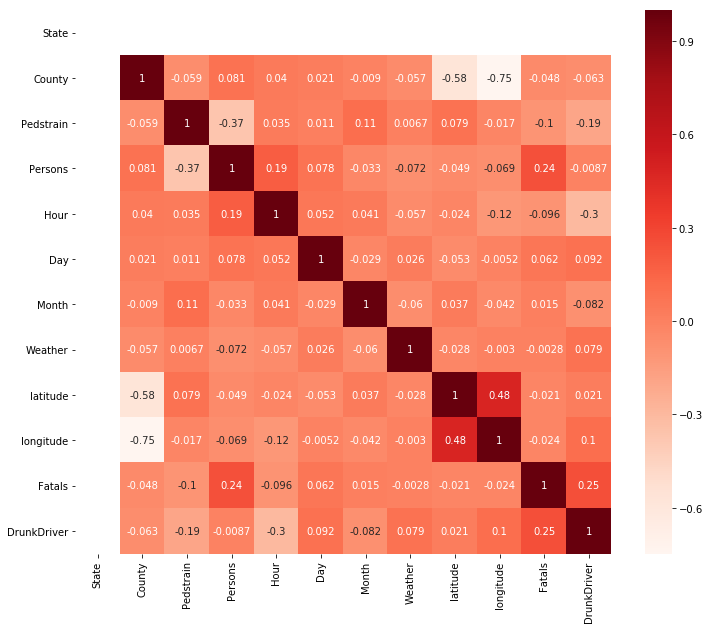

In [43]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = YY.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
#Correlation with output variable
cor_target = abs(cor["DrunkDriver"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Hour           0.302186
Fatals         0.253513
DrunkDriver    1.000000
Name: DrunkDriver, dtype: float64

In [45]:
address = 'Maryland,USA'

geolocator = Nominatim(user_agent="md_explorermm")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of maryland cities are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of maryland cities are 39.5162234, -76.9382069.


In [46]:


# set number of clusters
kclusters = 5

#mdMaryland_grouped_clustering = YY.drop('County', 1)
mdMaryland_grouped_clustering= YY.drop('County', 1)
mdMaryland_grouped_clustering= YY.drop('RoadType', 1)


mdMaryland_grouped_clustering
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mdMaryland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 3, 1, 1, 4, 3, 0], dtype=int32)

In [47]:
YY.insert(0, 'ClusterLabels', kmeans.labels_)


In [48]:
YY.head()
YY['DrunkDriver'].unique()
YY=YY[YY.DrunkDriver != 2]
YY['DrunkDriver'].unique()

array([0, 1])

In [49]:
# create map
map_clustersmm = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(YY['latitude'], YY['longitude'], YY['County'], YY['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustersmm)
       
map_clustersmm

In [36]:
#RoadTypeGroup = pd.get_dummies(YY['RoadType'],drop_first=True)


In [37]:
#YY = pd.concat([YY,RoadTypeGroup],axis=1)

In [58]:
YY.head()

ClusterLabels  State  County  Pedstrain  Persons  Hour  Day  Month  \
15121              4     24      33          1        1    12    1      1   
15122              4     24      27          0        1     0    7      1   
15123              4     24      33          0        1     9    3      1   
15124              2     24       3          0        1     8    9      1   
15127              3     24       5          0        2     3    3      1   

       Weather   RoadType   latitude  longitude  Fatals  DrunkDriver  
15121        1     US-301  38.674742   -76.8760       1            0  
15122        1     SR-100  39.211267   -76.7956       1            1  
15123        1     US-301  38.685731   -76.8720       1            0  
15124       98     SR-100  39.173733   -76.7368       1            1  
15127        1  I-70 RAMP  39.306864   -76.7416       1            1

In [55]:
from pandas import DataFrame
   
Data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010],
        'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
       }
  
df = DataFrame(Data,columns=['Year','Unemployment_Rate'])
df.plot(x ='Year', y='Unemployment_Rate', kind = 'line')

ModuleNotFoundError: No module named 'plotly.graph_objects'

In [51]:
# select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in YY.columns if col not in ['DrunkDriver','ClusterLabels','RoadType']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = YY[cols]
#assigning the Oppurtunity Result column as target
target = YY['DrunkDriver']
data.head(n=2)
#https://www.dataquest.io/blog/sci-kit-learn-tutorial/

State  County  Pedstrain  Persons  Hour  Day  Month  Weather  \
15121     24      33          1        1    12    1      1        1   
15122     24      27          0        1     0    7      1        1   

        latitude  longitude  Fatals  
15121  38.674742   -76.8760       1  
15122  39.211267   -76.7956       1

In [52]:

#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test 
setsdata_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)


In [53]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(setsdata_train,target_train)
predictions = logmodel.predict(data_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
#Evaluation
#We can check precision, recall,f1-score using classification report

from sklearn.metrics import classification_report
print(classification_report(target_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        63
           1       0.67      0.18      0.29        22

   micro avg       0.76      0.76      0.76        85
   macro avg       0.72      0.58      0.57        85
weighted avg       0.74      0.76      0.71        85



In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [135]:
import reverse_geocoder as rg 
import pprint 
  
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result) 
    #pprint.pprint(result['admin1'])
  
#Driver function 
#if __name__=="__main__": 
      
    # Coorinates tuple.Can contain more than one pair. 
    coordinates =(39.718633,-77.5067) 
      
reverseGeocode(coordinates)
  

[OrderedDict([('lat', '38.69678'),
              ('lon', '-76.84775'),
              ('name', 'Brandywine'),
              ('admin1', 'Maryland'),
              ('admin2', "Prince George's County"),
              ('cc', 'US')])]


In [31]:
YY["latitude"].iloc[0]

38.67474167

In [124]:
c=str(YY["latitude"].iloc[0])+","+str(YY["longitude"].iloc[0])
c
#.apply(lambda x: ''.join(x), axis=1)

'38.67474167,-76.876'

In [66]:
import pandas as pd
from geopy.geocoders import GoogleV3

In [81]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


Solving environment: | ^C
failed

CondaError: KeyboardInterrupt



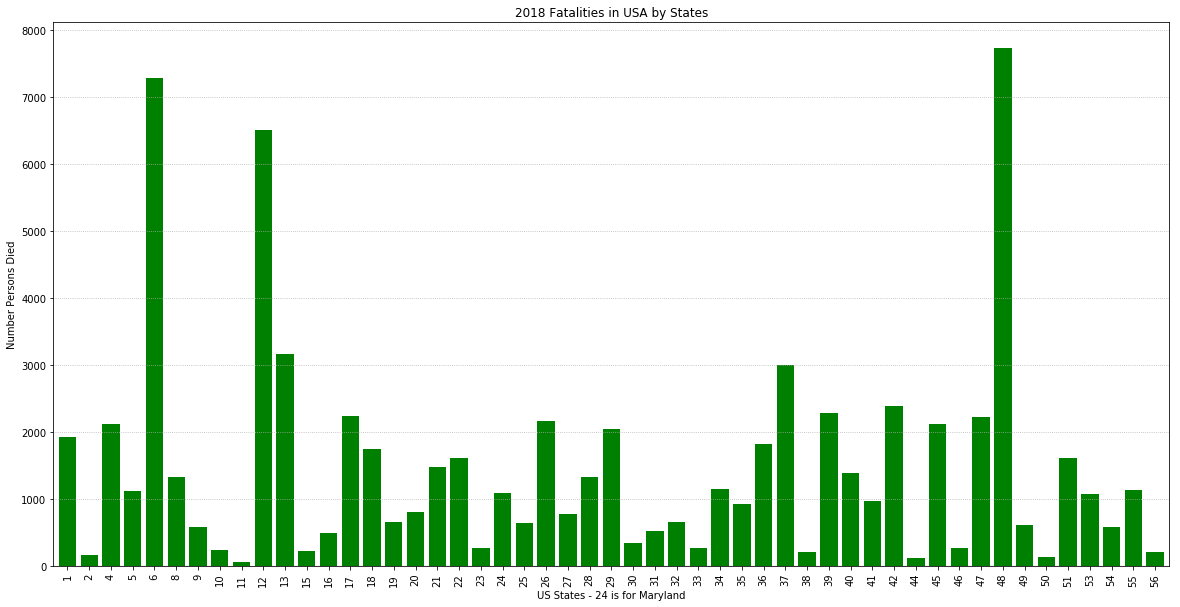

In [4]:
dfNew=df_data_acc.groupby('STATE', as_index=False).agg({"PERSONS": "sum"})

# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt
# For output plots inline in notebook:
%matplotlib inline
# For interactive plot controls on MatplotLib output:
# %matplotlib notebook
# Set the default figure size for all inline plots
# (note: needs to be AFTER the %matplotlib magic)
plt.rcParams['figure.figsize'] = [20, 10]

# Plotting directly from DataFrames with Pandas
dfNew.plot(
    x='STATE', 
    y='PERSONS', 
    kind='bar', 
    legend=False, 
    color='green',
    width=0.8
)
# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel("Number Persons Died")
plt.xlabel("US States - 24 is for Maryland")
plt.title("2018 Fatalities in USA by States")
plt.gca().yaxis.grid(linestyle=':')

In [198]:
# group countries by continents and apply sum() function 
df_continents = YY.groupby('State', axis=0).agg({"Persons": "sum"})


# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(YY.groupby('State', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


Persons
State         
24         656

In [199]:
# group countries by continents and apply sum() function 
df_continents = YY.groupby('Month', axis=0).agg({"Persons": "sum"})


# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(YY.groupby('Month', axis=0)))

df_continents

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


Persons
Month         
1           39
2           37
3           39
4           61
5           81
6           80
7           27
8           60
9           59
10          77
11          44
12          52

In [200]:
# Define the aggregation procedure outside of the groupby operation
aggregations = {
    'Persons':'sum',
    'Pedstrain':'sum'
}
XX=YY.groupby('Month').agg(aggregations)
XX

Persons  Pedstrain
Month                    
1           39          5
2           37          8
3           39          7
4           61          5
5           81          5
6           80         12
7           27          4
8           60         12
9           59         17
10          77         14
11          44          9
12          52         10

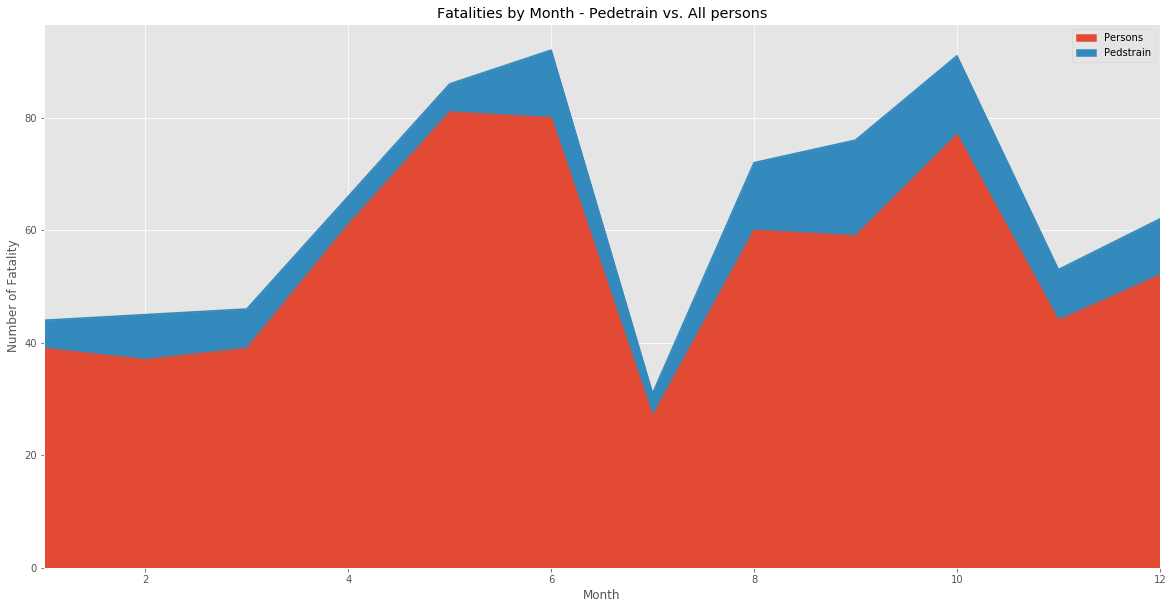

In [201]:
XX.index =XX.index.map(int) # let's change the index values of df_top5 to type integer for plotting
XX.plot(kind='area', 
             stacked=True,
            figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Fatalities by Month - Pedetrain vs. All persons')
plt.ylabel('Number of Fatality')
plt.xlabel('Month')

plt.show()

In [88]:
# group countries by continents and apply sum() function 
df_continents = YY.groupby('RoadType', axis=0).agg({"Persons": "sum"})


# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(YY.groupby('RoadType', axis=0)))

v=df_continents.sort_values(by='Persons',ascending=0).head(10)
v

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


Persons
RoadType         
I-95           38
US-301         28
I-695          26
SR-202         23
SR-5           18
SR-193         17
SR-3           14
US-40          13
SR-223         12
SR-7           12

In [89]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


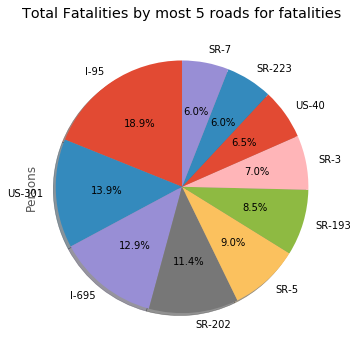

In [90]:
# autopct create %, start angle represent starting point
v['Persons'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Total Fatalities by most 5 roads for fatalities')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [91]:
#YY.groupby('RoadType', as_index=False).agg({"RoadType": "count"})
YY.groupby('RoadType').max()

ClusterLabels  State  County  Pedstrain  \
RoadType                                                                
CR-1077                                   1     24      27          0   
CR-1120                                   0     24      17          0   
CR-1178                                   0     24       3          0   
CR-1228                                   1     24      33          0   
CR-123                                    1     24      33          0   
CR-1317                                   1     24      27          1   
CR-137                                    0     24      17          0   
CR-1400                                   0     24       5          0   
CR-141                                    1     24      31          1   
CR-1633                                   0     24       3          0   
CR-1659                                   1     24      31          1   
CR-166                                    1     24      33          0   
CR-1734                                   1     24      33          0   
CR-1800                                   0     24       5          0   
CR-185                                    1     24      33          0   
CR-189                                    1     24      31          0   
CR-1900                                   0     24       5          0   
CR-1909                                   0     24       3          0   
CR-1910                                   2     24      27          0   
CR-212                                    1     24      31          0   
CR-23                                     0     24      17          0   
CR-232                                    1     24      33          0   
CR-2362                                   1     24      33          0   
CR-2714                                   0     24       3          0   
CR-279                                    1     24      27          0   
CR-2828                                   1     24      33          0   
CR-311                                    1     24      33          0   
CR-3600                                   0     24       5          0   
CR-4114                                   0     24       5          0   
CR-4142                                   0     24       5          0   
CR-415                                    0     24       5          0   
CR-441                                    0     24       5          0   
CR-4429                                   0     24       3          1   
CR-449                                    1     24      33          0   
CR-4604                                   1     24      31          1   
CR-50                                     2     24      17          0   
CR-5237                                   0     24       5          1   
CR-5284                                   0     24       5          1   
CR-5458                                   0     24       3          0   
CR-5496                                   0     24       3          0   
CR-55                                     1     24      27          0   
CR-5560                                   0     24       5          0   
CR-558                                    1     24      27          0   
CR-5768                                   0     24       3          0   
CR-611                                    0     24       5          1   
CR-6158                                   0     24       5          0   
CR-62                                     1     24      31          0   
CR-64                                     1     24      31          0   
CR-6539                                   0     24       5          0   
CR-70                                     0     24       5          0   
CR-73                                     1     24      33          0   
CR-7709                                   0     24       5          0   
CR-812                                    0     24       5          2   
CR-8138        

In [92]:

address = 'Montgomery County,MD'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of New York City are 39.1406267, -77.2075612.


In [78]:

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


Solving environment: done

# All requested packages already installed.



In [1]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, State, County in zip(YY['latitude'], YY['longitude'], YY['State'], YY['County']):
    label = '{}, {}'.format(State, County)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

NameError: name 'folium' is not defined

In [83]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 8)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(YY.latitude, YY.longitude, str(YY.County)):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [84]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=k,
    columns=['M', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

NameError: name 'world_map' is not defined

In [220]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(YY.latitude, YY.longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(YY.latitude)
longitudes = list(YY.longitude)
labels = list(str(YY.County))

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [ ]:
from geopy.geocoders import Nominatim
nom=Nominatim()
n=nom.geocode("Wheaton,MD")
n
df_filtered_MD["Address"]=df_filtered_MD["CityState"].apply(nom.geocode)
df_filtered_MD["latitude"]=df_filtered_MD["Address"].apply(lambda x: x.latitude if x !=None else None)
df_filtered_MD["longitude"]=df_filtered_MD["Address"].apply(lambda x: x.latitude if x !=None else None)
#df_filtered_MD=df_filtered_MD[2:]
df_filtered_MD

In [72]:
from geopy.geocoders import Nominatim
nom=Nominatim()
n=nom.geocode("Wheaton,MD")
n

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning:

Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



Location(Wheaton, Montgomery County, Maryland, 20902, USA, (39.0398314, -77.0552555, 0.0))

In [6]:
print('The dataframe has {} Cities in sample {} VA data.'.format(
        len(df_filtered['City name'].unique()),
        df_filtered.shape[0]
    )
)

The dataframe has 3 Cities in sample 3 VA data.


In [3]:
print('The dataframe has {} Cities in sample {} State data.'.format(
        len(YY['STATE'].unique()),
        YY.shape[0]
    )
)

The dataframe has 1 Cities in sample 5 State data.


In [74]:
df_filtered_MD

City name  Total 2010 Population  \
25                    Barnesville town                    172   
39                            Bethesda                  60858   
50                    Bowleys Quarters                   6755   
58                    Brookeville town                    134   
60                           Brookmont                   3468   
69                        Burtonsville                   8323   
71                          Cabin John                   2280   
74                 Calverton (partial)                  17724   
81                              Carney                  29941   
82                         Catonsville                  41567   
98                         Chevy Chase                   9545   
99    Chevy Chase Section Five village                    658   
100  Chevy Chase Section Three village                    760   
101                   Chevy Chase town                   2824   
102              Chevy Chase View town                    920   
103           Chevy Chase Village town                   1953   
109                         Clarksburg                  13766   
113                           Cloverly                  15126   
115                       Cockeysville                  20776   
116                         Colesville                  14647   
131                           Damascus                  15257   
136                         Darnestown                   6802   
143                            Derwood                   2381   
148                            Dundalk                  63597   
158                           Edgemere                   8669   
172                              Essex                  39262   
173                           Fairland                  23681   
186                        Forest Glen                   6582   
193                       Four Corners                   7945   
199         Friendship Heights Village                   4698   
..                                 ...                    ...   
359          North Chevy Chase village                    555   
361                   North Kensington                   9514   
363                      North Potomac                  24410   
370                              Olney                  33844   
371                            Overlea                  12275   
373                       Owings Mills                  30622   
377                          Parkville                  30734   
383                         Perry Hall                  28474   
386                         Pikesville                  30764   
396                   Poolesville town                   4883   
399                            Potomac                  44965   
413                       Randallstown                  32430   
415                            Redland                  17242   
417                       Reisterstown                  25968   
428                     Rockville city                  61285   
431                           Rosedale                  19257   
433                          Rossville                  15147   
450                      Silver Spring                  71452   
455                      Somerset town                   1216   
456                   South Kensington                   8462   
458                       Spencerville                   1594   
473                   Takoma Park city                  16715   
483                           Timonium                   9925   
485                             Towson                  55197   
487                           Travilah                  12159   
499              Washington Grove town                    548   
509                            Wheaton                  48284   
510                        White Marsh                   9513   
511                          White Oak                  17403   
518                           Woodlawn                  37879   

In [65]:

address = 'Montgomery County,MD'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of New York City are 39.1406267, -77.2075612.


In [84]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [66]:
# create map of New York using latitude and longitude values
map_VAcities = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng , CityState in zip(df_filtered_MD['latitude'], df_filtered_MD['longitude'], df_filtered_MD['CityState']):
    label = '{}'.format(CityState)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_VAcities)  
    
map_VAcities

KeyError: 'latitude'

In [85]:
address1 = 'Montgomery County,MD'
#address = 'USA'

geolocator = Nominatim(user_agent="ss_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Alexandria City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Alexandria City are 39.1406267, -77.2075612.


In [86]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=TOYINSWAIHDVPGNDKONIVD4A11BHWMOPKSLXBJ1BEBYUQDXL&client_secret=UHMVWV2XXZT4QWPZD5X24CKE0HKOR3NQGLAWCBN4HSPIM1EG&v=20180605&ll=39.1406267,-77.2075612&radius=500&limit=100'

In [87]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5db4b3a6d9a6e6002b71afa1'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Gaithersburg',
  'headerFullLocation': 'Gaithersburg',
  'headerLocationGranularity': 'city',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 39.1451267045, 'lng': -77.2017700600332},
   'sw': {'lat': 39.136126695499996, 'lng': -77.2133523399668}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8ac7f1f964a520888032e3',
       'name': 'Rugged Wearhouse',
       'location': {'address': '230 N Frederick Ave',
        'lat': 39.14370369762039,
        'lng': -77.20355361700058,
        'labeledLatLngs': [{'label': 'display',
          'lat': 39.14370369762039,
  

In [24]:
CLIENT_ID = '124G52PSE4CYY3X4ARA1XIJAQ3IOUVAEORYXFQFHYUOP0V41'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET ='O4HCW0EGO2BCBJJGCFWTI0FQ1YAB1W2LGAVLHH21C3CLUL1M'# 'your-client-secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 124G52PSE4CYY3X4ARA1XIJAQ3IOUVAEORYXFQFHYUOP0V41
CLIENT_SECRET:O4HCW0EGO2BCBJJGCFWTI0FQ1YAB1W2LGAVLHH21C3CLUL1M


In [88]:
#danie.abebe

CLIENT_ID = 'TOYINSWAIHDVPGNDKONIVD4A11BHWMOPKSLXBJ1BEBYUQDXL'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET ='UHMVWV2XXZT4QWPZD5X24CKE0HKOR3NQGLAWCBN4HSPIM1EG'# 'your-client-secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TOYINSWAIHDVPGNDKONIVD4A11BHWMOPKSLXBJ1BEBYUQDXL
CLIENT_SECRET:UHMVWV2XXZT4QWPZD5X24CKE0HKOR3NQGLAWCBN4HSPIM1EG


In [79]:
address = 'Montgomery County,MD'
#address = 'USA'

geolocator = Nominatim(user_agent="ss_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Alexandria City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Alexandria City are 39.1406267, -77.2075612.


In [89]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=TOYINSWAIHDVPGNDKONIVD4A11BHWMOPKSLXBJ1BEBYUQDXL&client_secret=UHMVWV2XXZT4QWPZD5X24CKE0HKOR3NQGLAWCBN4HSPIM1EG&v=20180605&ll=39.1406267,-77.2075612&radius=500&limit=100'

In [100]:
df_filtered_MD

City name  Total 2010 Population  \
25                    Barnesville town                    172   
39                            Bethesda                  60858   
50                    Bowleys Quarters                   6755   
58                    Brookeville town                    134   
60                           Brookmont                   3468   
69                        Burtonsville                   8323   
71                          Cabin John                   2280   
74                 Calverton (partial)                  17724   
81                              Carney                  29941   
82                         Catonsville                  41567   
98                         Chevy Chase                   9545   
99    Chevy Chase Section Five village                    658   
100  Chevy Chase Section Three village                    760   
101                   Chevy Chase town                   2824   
102              Chevy Chase View town                    920   
103           Chevy Chase Village town                   1953   
109                         Clarksburg                  13766   
113                           Cloverly                  15126   
115                       Cockeysville                  20776   
116                         Colesville                  14647   
131                           Damascus                  15257   
136                         Darnestown                   6802   
143                            Derwood                   2381   
148                            Dundalk                  63597   
158                           Edgemere                   8669   
172                              Essex                  39262   
173                           Fairland                  23681   
186                        Forest Glen                   6582   
193                       Four Corners                   7945   
199         Friendship Heights Village                   4698   
..                                 ...                    ...   
359          North Chevy Chase village                    555   
361                   North Kensington                   9514   
363                      North Potomac                  24410   
370                              Olney                  33844   
371                            Overlea                  12275   
373                       Owings Mills                  30622   
377                          Parkville                  30734   
383                         Perry Hall                  28474   
386                         Pikesville                  30764   
396                   Poolesville town                   4883   
399                            Potomac                  44965   
413                       Randallstown                  32430   
415                            Redland                  17242   
417                       Reisterstown                  25968   
428                     Rockville city                  61285   
431                           Rosedale                  19257   
433                          Rossville                  15147   
450                      Silver Spring                  71452   
455                      Somerset town                   1216   
456                   South Kensington                   8462   
458                       Spencerville                   1594   
473                   Takoma Park city                  16715   
483                           Timonium                   9925   
485                             Towson                  55197   
487                           Travilah                  12159   
499              Washington Grove town                    548   
509                            Wheaton                  48284   
510                        White Marsh                   9513   
511                          White Oak                  17403   
518                           Woodlawn                  37879   

In [9]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

NameError: name 'CLIENT_ID' is not defined

In [94]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5db4b3e5be7078002c8d07c9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Gaithersburg',
  'headerFullLocation': 'Gaithersburg',
  'headerLocationGranularity': 'city',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 39.1451267045, 'lng': -77.2017700600332},
   'sw': {'lat': 39.136126695499996, 'lng': -77.2133523399668}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8ac7f1f964a520888032e3',
       'name': 'Rugged Wearhouse',
       'location': {'address': '230 N Frederick Ave',
        'lat': 39.14370369762039,
        'lng': -77.20355361700058,
        'labeledLatLngs': [{'label': 'display',
          'lat': 39.14370369762039,
  

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()
nearby_venues

NameError: name 'results' is not defined

In [3]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [4]:
#df_data_acc[["STATE",'LATITUDE','LONGITUD']]
# type your answer here

va_venues = getNearbyVenues(names=df_filtered_MD['CityState'],
                                   latitudes=df_filtered_MD['latitude'],
                                   longitudes=df_filtered_MD['longitude']
                                  )

va_venues

NameError: name 'df_filtered_MD' is not defined

In [28]:
va_venues.shape

(1, 7)

In [1]:
# type your answer here

va_venues = getNearbyVenues(names=df_filtered_MD['CityState'],
                                   latitudes=df_filtered_MD['latitude'],
                                   longitudes=df_filtered_MD['longitude']
                                  )

va_venues

NameError: name 'getNearbyVenues' is not defined

In [ ]:
address = 'Alexandria City, VA'

geolocator = Nominatim(user_agent="ss_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Alexandria City are {}, {}.'.format(latitude, longitude))

TypeError: zip argument #2 must support iteration

In [ ]:
print(manhattan_venues.shape)
manhattan_venues.head()